In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry.point import Point
import pycountry

In [ ]:
#pip install 

In [437]:
url = 'https://drive.google.com/file/d/145G_Q3MvaE6aYeYAUMzf1bFXgPVlms9g/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [438]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### pt.1
Allright, the first thing I want to visualize is the dependency of the genre's popularity vs year. For that I gonna split the movies into some set of genres (one movie may be in two columns at the same time) and make two datasets - 1st with the share of the specific genre among the other genres in that year, and 2nd with the share of this year's among the other years for the same genre. That may help to identify two things: 

1) the change of audience's taste thru the years - we may see that, for example, dramas popularity has risen for the last couple of years

2) the star-time for each genre - the most of documentals could've been made in early 90th and so on

In [ ]:
df['listed_in'].values[0] # the genres come like this so first I gonna get rid of all the stuff except for the key words

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
def get_unique_values(df_values):
    result = []
    for i in df_values:
        if type(i)==str:
            j = i.split(',')
            for jj in j: 
                jj = jj.strip()
                if len(jj)>0:
                    result.append(jj)
    result = list(dict.fromkeys(result))
    return result

In [ ]:
genres = get_unique_values(df['listed_in'].values)# not the best NLP ever, but it works

In [ ]:
print(genres)

['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'Dramas', 'International Movies', 'Horror Movies', 'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy', 'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries', 'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series', 'Reality TV', 'TV Comedies', 'Romantic Movies', 'Romantic TV Shows', 'Science & Nature TV', 'Movies', 'British TV Shows', 'Korean TV Shows', 'Music & Musicals', 'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV", 'TV Action & Adventure', 'Spanish-Language TV Shows', 'Children & Family Movies', 'TV Shows', 'Classic Movies', 'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows', 'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features', 'TV Thrillers', 'Classic & Cult TV']


In [ ]:
international = ['International TV Shows','International Movies','British TV Shows','Korean TV Shows',\
                'Spanish-Language TV Shows']
comedy = ['Comedies','TV Comedies','Stand-Up Comedy & Talk Shows','Stand-Up Comedy','LGBTQ Movies']
thrills = ['Horror Movies','TV Mysteries','Thrillers','TV Horror','TV Thrillers','Crime TV Shows']
dramas = ['TV Dramas','Dramas']
girl_stuff = ['Romantic Movies', 'Romantic TV Shows','Teen TV Shows']
fantasy = ['TV Sci-Fi & Fantasy','Sci-Fi & Fantasy']
family = ['Children & Family Movies',"Kids' TV"]
action = ['TV Action & Adventure','Action & Adventure']
docum = ['Docuseries', 'Documentaries','Science & Nature TV','Faith & Spirituality']

In [ ]:
df['TV'] = df['listed_in'].apply(lambda x: 1 if 'TV' in x else 0)

In [ ]:
df['not TV'] = df['listed_in'].apply(lambda x: 1 if 'TV' not in x else 0)

In [ ]:
df['action'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in action) else 0)

In [ ]:
df['comedy'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in comedy) else 0 )

In [ ]:
df['\'thrills\''] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in thrills) else 0)

In [ ]:
df['teen-orientired'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in girl_stuff) else 0)

In [ ]:
df['family'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in family) else 0)

In [ ]:
df['internetional'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in international) else 0)

In [ ]:
df['documentary'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in docum) else 0)

In [ ]:
df['fantastic'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in fantasy) else 0)

In [ ]:
df['dramas'] = df['listed_in'].apply(lambda x: 1 if any(i in x for i in dramas) else 0)

In [ ]:
df['shows'] = df['listed_in'].apply(lambda x: 1 if 'Shows' in x or 'Reality' in x else 0)

In [ ]:
df['musical'] = df['listed_in'].apply(lambda x: 1 if 'Music' in x or 'Musicals' in x else 0)

In [ ]:
df['for real men only (anime)'] = df['listed_in'].apply(lambda x: 1 if 'Anime' in x else 0)

In [ ]:
df['sport'] = df['listed_in'].apply(lambda x: 1 if 'Sports' in x else 0)

In [ ]:
df['sport'].value_counts() # this genre definitely aint the most popular one

0    7591
1     196
Name: sport, dtype: int64

In [ ]:
df['teen-orientired'].value_counts(),df['for real men only (anime)'].value_counts() # capitalism as it is =)

(0    6871
 1     916
 Name: teen-orientired, dtype: int64, 0    7582
 1     205
 Name: for real men only (anime), dtype: int64)

In [ ]:
df_1 = df.iloc[:,[7,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]

In [ ]:
df_1.head() # got this guy with binary genre data for each year

,release_year,TV,not TV,action,comedy,'thrills',teen-orientired,family,internetional,documentary,fantastic,dramas,shows,musical,for real men only (anime),sport
0,2020,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0
1,2016,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2011,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,2009,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2008,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_what_i_need = df_1.groupby('release_year').sum()
df_what_i_need = df_what_i_need.iloc[41:-1,:] # checking from the 1990's by 2020

In [ ]:
df_what_i_need.tail(5) 

,TV,not TV,action,comedy,'thrills',teen-orientired,family,internetional,documentary,fantastic,dramas,shows,musical,for real men only (anime),sport
release_year,,,,,,,,,,,,,,,
2016,234,648,86,235,135,91,88,458,175,22,328,183,24,14,32
2017,257,755,88,295,162,99,100,476,218,28,350,188,31,16,29
2018,364,757,109,322,217,105,128,546,190,48,401,280,38,32,27
2019,401,595,81,283,217,117,128,467,155,36,358,290,45,25,24
2020,439,429,72,277,170,101,152,392,139,21,267,315,27,22,15


In [ ]:
share_this_year = df_what_i_need.iloc[:,2:].apply(lambda x: x/np.sum(df_what_i_need.iloc[:,2:].values,axis=1)*100) 

In [ ]:
first2sum = np.sum(df_what_i_need.iloc[:,:2],axis = 1)
share_this_year['TV'] = df_what_i_need['TV']/first2sum*100
share_this_year['not TV'] = df_what_i_need['not TV']/first2sum*100

In [ ]:
share_this_year.tail() # values are in %, 100 in eacth row

,action,comedy,'thrills',teen-orientired,family,internetional,documentary,fantastic,dramas,shows,musical,for real men only (anime),sport,TV,not TV
release_year,,,,,,,,,,,,,,,
2016,4.596472,12.560128,7.215393,4.863709,4.703367,24.478888,9.353287,1.175842,17.530732,9.780866,1.282737,0.748263,1.710315,26.530612,73.469388
2017,4.230769,14.182692,7.788462,4.759615,4.807692,22.884615,10.480769,1.346154,16.826923,9.038462,1.490385,0.769231,1.394231,25.395257,74.604743
2018,4.461727,13.180516,8.882521,4.297994,5.239460,22.349570,7.777323,1.964797,16.414245,11.461318,1.555465,1.309865,1.105199,32.471008,67.528992
2019,3.638814,12.713387,9.748428,5.256065,5.750225,20.979335,6.963163,1.617251,16.082659,13.027853,2.021563,1.123091,1.078167,40.261044,59.738956
2020,3.654822,14.060914,8.629442,5.126904,7.715736,19.898477,7.055838,1.065990,13.553299,15.989848,1.370558,1.116751,0.761421,50.576037,49.423963


In [ ]:
sum(share_this_year.iloc[0,:-2]) 

100.0

In [ ]:
share_all_years = df_what_i_need.iloc[:,2:].apply(lambda x: round(x/sum(x),4)*100) 

In [ ]:
share_all_years['TV'] = df_what_i_need['TV']/sum(df_what_i_need['TV'])*100
share_all_years['not TV'] = df_what_i_need['not TV']/sum(df_what_i_need['not TV'])*100

In [ ]:
share_all_years.tail() # 100 in each column

,action,comedy,'thrills',teen-orientired,family,internetional,documentary,fantastic,dramas,shows,musical,for real men only (anime),sport,TV,not TV
release_year,,,,,,,,,,,,,,,
2016,10.60,10.04,10.89,10.10,9.52,12.41,15.13,7.61,12.14,10.75,7.82,7.0,16.93,10.231745,12.354623
2017,10.85,12.60,13.06,10.99,10.82,12.90,18.84,9.69,12.96,11.05,10.10,8.0,15.34,11.237429,14.394662
2018,13.44,13.75,17.50,11.65,13.85,14.80,16.42,16.61,14.85,16.45,12.38,16.0,14.29,15.916047,14.432793
2019,9.99,12.09,17.50,12.99,13.85,12.66,13.40,12.46,13.25,17.04,14.66,12.5,12.70,17.533887,11.344137
2020,8.88,11.83,13.71,11.21,16.45,10.62,12.01,7.27,9.89,18.51,8.79,11.0,7.94,19.195453,8.179218


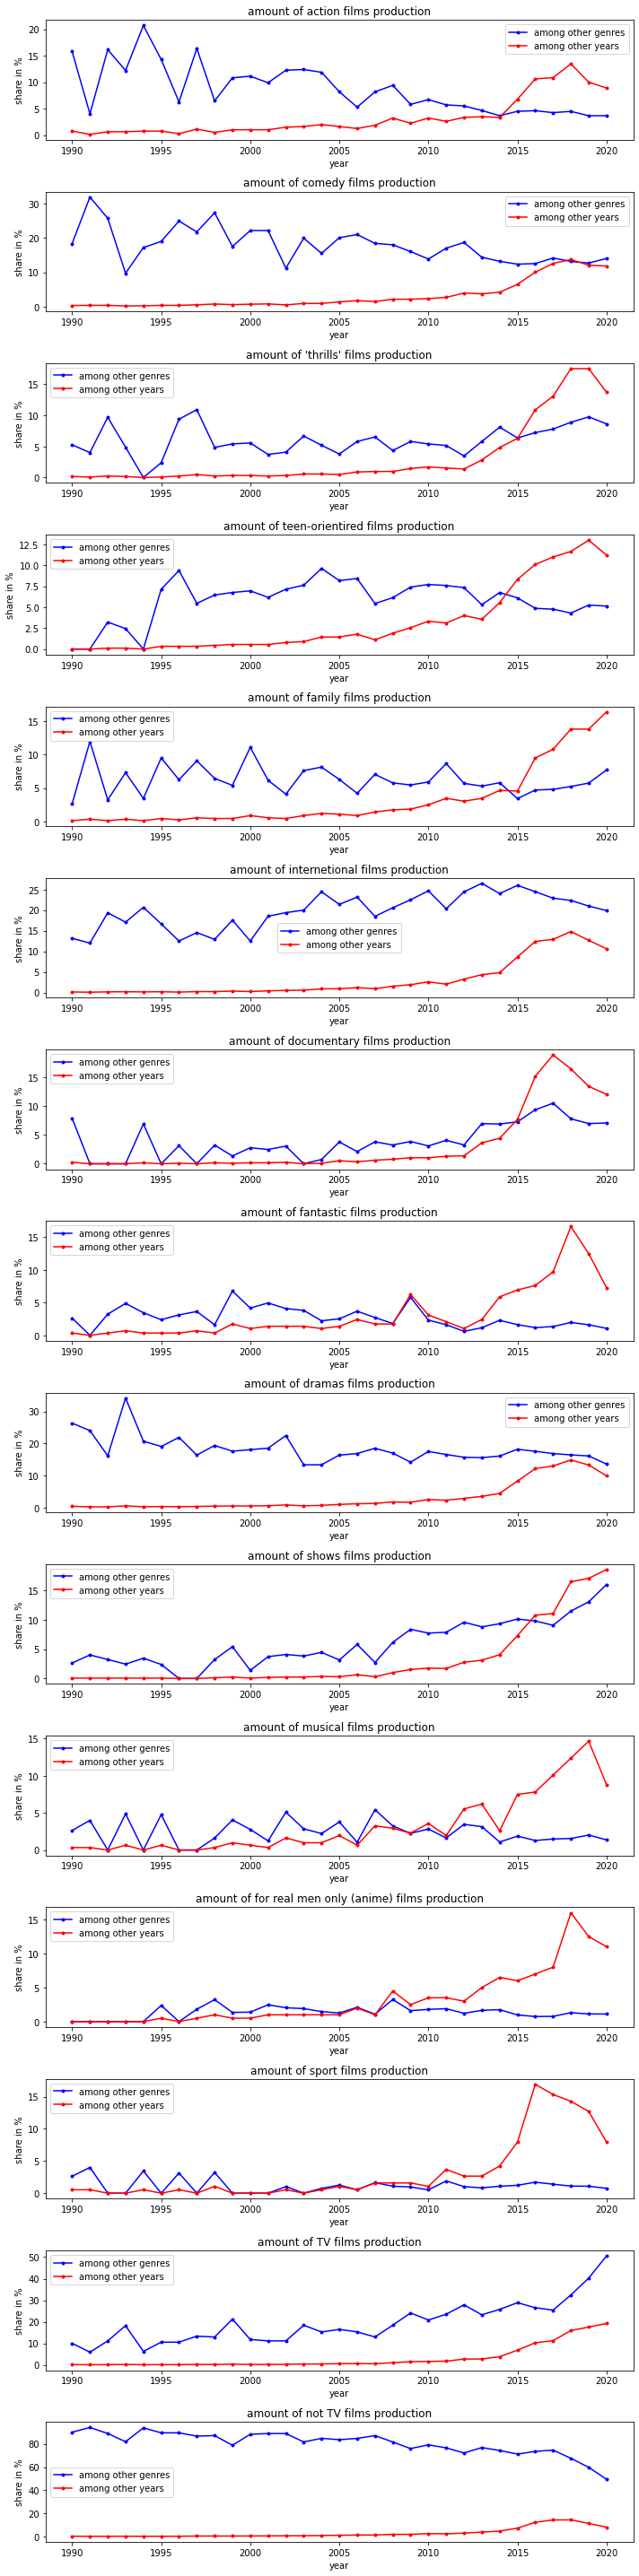

In [ ]:
fig, ax = plt.subplots(share_this_year.shape[1],1,figsize=(10,40))
for i in range(share_this_year.shape[1]):
    ax[i].plot(share_this_year.iloc[:,i],color = 'blue',marker='.',label = 'among other genres')
    ax[i].plot(share_all_years.iloc[:,i],color = 'red',marker='.',label = 'among other years')
    ax[i].set_xlabel("year")
    ax[i].set_ylabel("share in %")
    ax[i].set_title(f"amount of {share_this_year.columns[i]} films production")
    ax[i].legend()  

    fig.tight_layout()

Now about some insights from the charts:

First of all, TV shows (aka series), sitcoms and stuff becoming more and more popular with the years - it almost 50/50 with the not TV-orinted format right now, while years back TV format contributed 20% only.

The biggest Netflix boom for almost all the genres was in 2018, except for the TV reality and shows  - their amount continued to rise even in 2020, while it was the 'bad' year for all the others.

Some genres, even despite the heavy increase in production over the last years (like fantasy\fantastic) did not improve their state among the other genres. 

While all of the genres had their picks in the recent years, most of them didnt become more popular comparing to the others - stuff like sport, anime, fantastic and family movies, dramas and so on contributes roughly the same to the total production for the last 20-30 years. For example the drama genre keeps it's solid position of ~20% of total prod. since 90th.

However, except for the TV shows, there are several more genres which became more popular in the recent years: total amount of international movies and sitcoms (spanish stuff and so on) and documentary movies has increased - it seems that audience pay more attention to these, than to the blockbusters and adventures -  production of those has decreased almost twice since 1995.

Also, it seems that comedy became less popular and 'thrills' movies became more popular since 90th - that also indicates some change in the audiece's taste.

### pt.2

In this part, I'll plot smth on the map =)

The plan was to plot the amount of total or certain genre movies made by each country, but considering that almost 90% of all movies were made by (or including) USA or UK, the map wouldn't look that interesting and the idea is too generic I guess. And I already showed smth with genres in the pt.1. 
SO, intead of some plain stuff I decided to find out, which letter is the country's favorite as the first letter of the title of the movie, that this country has produced. It aint a world changin visualization, but at least that might be a bit funny to do. I won't include numbers to that.


The idea is: you click on 'b', click on China and see how much movies which starts with 'be' were made by/with help of China. 

In [ ]:
countries = get_unique_values(df.country.values)

In [ ]:
dic = dict.fromkeys(countries) # creating dict for further needs

In [ ]:
import string
letters = list(string.ascii_lowercase)

In [ ]:
for key in list(dic.keys()):
    dic[key] = dict.fromkeys(letters)
    for key2 in list(dic[key].keys()):
        dic[key][key2] = 0    

In [ ]:
dic['United Kingdom'] # it looks like that now

{'a': 0,
 'b': 0,
 'c': 0,
 'd': 0,
 'e': 0,
 'f': 0,
 'g': 0,
 'h': 0,
 'i': 0,
 'j': 0,
 'k': 0,
 'l': 0,
 'm': 0,
 'n': 0,
 'o': 0,
 'p': 0,
 'q': 0,
 'r': 0,
 's': 0,
 't': 0,
 'u': 0,
 'v': 0,
 'w': 0,
 'x': 0,
 'y': 0,
 'z': 0}

In [ ]:
for i,r in df.iterrows():
    if type(r.country) == str:
        made_by = r.country.split(',')
        cleaned = []
        for m in made_by:
            if len(m)>0:
                cleaned.append(m.strip())
        first_letter = r.title[0].lower()
        if first_letter in letters:
            for country in cleaned:
                dic[country][first_letter]+=1

In [ ]:
dic['United Kingdom'] # seems british guys have some weird love to 't' (got it? 't' like 'tea',ha)

{'a': 39,
 'b': 38,
 'c': 39,
 'd': 33,
 'e': 18,
 'f': 24,
 'g': 24,
 'h': 29,
 'i': 23,
 'j': 12,
 'k': 15,
 'l': 26,
 'm': 53,
 'n': 17,
 'o': 14,
 'p': 21,
 'q': 2,
 'r': 23,
 's': 52,
 't': 163,
 'u': 8,
 'v': 7,
 'w': 31,
 'x': 1,
 'y': 3,
 'z': 2}

In [183]:
df_letters = pd.DataFrame()
i = 0
for key in list(dic.keys()):
    temp_df = pd.DataFrame(dic[key],index=[i])
    df_letters= pd.concat((df_letters,temp_df),axis=0)
    i+=1
df_letters['Country'] = dic.keys()
cols = list(df_letters.columns)[-1:]+list(df_letters.columns)[:-1]
df_letters = df_letters[cols]

In [184]:
df_letters.head() # voila

,Country,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,Brazil,10,6,5,3,4,4,2,0,0,2,2,8,4,3,6,1,0,4,6,11,1,1,3,0,0,1
1,Mexico,8,7,11,8,9,5,0,3,5,2,1,17,11,5,0,3,1,13,12,21,2,1,1,0,4,2
2,Singapore,5,4,1,0,1,1,0,1,1,0,0,3,3,0,1,0,0,2,2,8,1,0,1,0,2,0
3,United States,223,194,168,157,66,107,101,137,86,86,70,117,202,91,58,121,12,107,301,645,29,23,112,4,14,10
4,Turkey,5,12,4,8,6,1,5,6,4,0,9,6,6,3,3,2,0,3,4,8,0,2,3,0,2,0


In [163]:
df_letters_share = df_letters.iloc[:,1:].apply(lambda x: x/np.sum(df_letters.iloc[:,1:].values,axis=1))

In [164]:
df_letters_share['Country'] = df_letters['country']
cols = list(df_letters_share.columns)[-1:]+list(df_letters_share.columns)[:-1]
df_letters_share = df_letters_share[cols]

In [165]:
df_letters_share.head()

,Country,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,Brazil,0.114943,0.068966,0.057471,0.034483,0.045977,0.045977,0.022989,0.000000,0.000000,0.022989,0.022989,0.091954,0.045977,0.034483,0.068966,0.011494,0.000000,0.045977,0.068966,0.126437,0.011494,0.011494,0.034483,0.000000,0.000000,0.011494
1,Mexico,0.052632,0.046053,0.072368,0.052632,0.059211,0.032895,0.000000,0.019737,0.032895,0.013158,0.006579,0.111842,0.072368,0.032895,0.000000,0.019737,0.006579,0.085526,0.078947,0.138158,0.013158,0.006579,0.006579,0.000000,0.026316,0.013158
2,Singapore,0.135135,0.108108,0.027027,0.000000,0.027027,0.027027,0.000000,0.027027,0.027027,0.000000,0.000000,0.081081,0.081081,0.000000,0.027027,0.000000,0.000000,0.054054,0.054054,0.216216,0.027027,0.000000,0.027027,0.000000,0.054054,0.000000
3,United States,0.068806,0.059858,0.051836,0.048442,0.020364,0.033015,0.031163,0.042271,0.026535,0.026535,0.021598,0.036100,0.062326,0.028078,0.017896,0.037334,0.003703,0.033015,0.092873,0.199013,0.008948,0.007097,0.034557,0.001234,0.004320,0.003085
4,Turkey,0.049020,0.117647,0.039216,0.078431,0.058824,0.009804,0.049020,0.058824,0.039216,0.000000,0.088235,0.058824,0.058824,0.029412,0.029412,0.019608,0.000000,0.029412,0.039216,0.078431,0.000000,0.019608,0.029412,0.000000,0.019608,0.000000


In [168]:
sum(df_letters_share.iloc[0,1:])

1.0

df at top were for the pre-beta purpose, but I decided to do map plot with abs values, not the % - it won't change alot anyways

In [185]:
#df_letters_share['Country'].replace('United States', 'United States of America', inplace=True)
df_letters['Country'].replace('United States', 'United States of America', inplace=True)

In [170]:
geolocator = Nominatim(user_agent="map")
def geolocate(country):
    try:
        location = geolocator.geocode(country)
        return (location.longitude, location.latitude)
    except:
        return np.nan

In [171]:
def GeoDataMaker(df, world):  # getting coordinates
    contries_coords = {country: geolocate(country) for country in df['Country']}
    df['geo_coords'] = df['Country'].map(contries_coords)
    df['longitude'] = df['geo_coords'].apply(lambda x: x[0])
    df['latitude'] = df['geo_coords'].apply(lambda x: x[1])  
    countries = {}  
    for country in pycountry.countries:
        countries[country.name] = country.alpha_3
    df['iso3'] = df['Country'].map(countries)
    cooler_df = pd.merge(df, world, on='Country')
    cooler_df.drop(columns = ['name'],inplace=True)
    return cooler_df

In [186]:
df_final = GeoDataMaker(df_letters,world)

In [187]:
df_final.head(3) # got needed data with geo encodings

,Country,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,geo_coords,longitude,latitude,iso3,pop_est,continent,iso_a3,gdp_md_est,geometry
0,Brazil,10,6,5,3,4,4,2,0,0,2,2,8,4,3,6,1,0,4,6,11,1,1,3,0,0,1,"(-53.2, -10.3333333)",-53.200000,-10.333333,BRA,207353391,South America,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
1,Mexico,8,7,11,8,9,5,0,3,5,2,1,17,11,5,0,3,1,13,12,21,2,1,1,0,4,2,"(-100.0000375, 22.5000485)",-100.000038,22.500048,MEX,124574795,North America,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
2,United States of America,223,194,168,157,66,107,101,137,86,86,70,117,202,91,58,121,12,107,301,645,29,23,112,4,14,10,"(-100.4458825, 39.7837304)",-100.445882,39.783730,NaN,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [188]:
cols = ['Country', *list(df_final.columns[1:-9])]
letters = letters
df_pivot = df_final[cols].melt(id_vars=['Country'], value_vars= letters, var_name='letter', value_name='count')  

In [189]:
df_pivot.head()

,Country,letter,count
0,Brazil,a,10
1,Mexico,a,8
2,United States of America,a,223
3,Turkey,a,5
4,Egypt,a,11


In [190]:
df_share = df_final.iloc[:,:-9]

In [191]:
df_share.head()

,Country,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,Brazil,10,6,5,3,4,4,2,0,0,2,2,8,4,3,6,1,0,4,6,11,1,1,3,0,0,1
1,Mexico,8,7,11,8,9,5,0,3,5,2,1,17,11,5,0,3,1,13,12,21,2,1,1,0,4,2
2,United States of America,223,194,168,157,66,107,101,137,86,86,70,117,202,91,58,121,12,107,301,645,29,23,112,4,14,10
3,Turkey,5,12,4,8,6,1,5,6,4,0,9,6,6,3,3,2,0,3,4,8,0,2,3,0,2,0
4,Egypt,11,6,2,4,4,4,3,2,1,0,1,4,9,1,3,1,0,4,10,28,2,1,2,1,0,1


In [192]:
base = alt.Chart(world).mark_geoshape( # base world map
    fill = 'lightgray',
).project('equirectangular'
).properties(
    width = 800, 
    height = 600
)

In [193]:
geo_data = df_final[['Country', 'longitude', 'latitude', 'geometry']].copy().set_geometry('geometry') # geodata goes here

In [194]:
cols = letters

In [197]:
dropdown = alt.binding_radio(options=cols)
select_letter = alt.selection_single(fields=['letter'], 
                                       bind=dropdown, 
                                       name='Select', 
                                       init={'letter':'a'})
select_region = alt.selection(type='multi', fields=['Country'])

map = alt.Chart(geo_data).mark_geoshape(
    stroke = 'darkgray', strokeWidth = 1
).encode(
 tooltip = [alt.Tooltip("Country:N", title="Country"),alt.Tooltip("count:Q", format='.2f', title="amount of titles starts with this letter"),],
).transform_lookup(lookup = 'Country',from_ = alt.LookupData(data = df_share, key = 'Country', fields = cols + ['count'])
).transform_fold(cols, as_=['letter', 'count']
).transform_calculate(letter='datum.letter'
).encode(fill = alt.Fill('count:Q', scale = alt.Scale(scheme='reds'),title='count'),opacity = alt.condition(select_region, alt.value(1), alt.value(0.05))
).add_selection(select_letter
).transform_filter(select_letter
).add_selection(select_region)

final_map = alt.layer(base, map).properties(width=1000, height=700)


final_map


alt.LayerChart(...)

Well, some countries in Africa are missing, but it seems they're just not included into Netflix movies production, so that aint a big loss.

About the insights: I thought this plot gonna be a bit more informativ ebut somewhere deep in my heart I knew that the idea isnt so genius =)..

Kazakhstan and Paraguay have produced only one movie (mb even together, who knows) which stars with 't'. India is a second world-wide provider of movies which starts with 'y' and the same for 'z'. And this map bored me after 2 min clicking it, but the mission I've stated is done as I wanted to.

### pt.3

To squeeze maximum from this data set I'd like to do some data science visualization with NLP-like objective (sounds better than it really is).

So, I'll take a look at the movies descriptions and will find some dependencies - the purpose is to perform clustering of the titles based on the movies descriptions.

In [500]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aweso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aweso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [440]:
df = df.dropna()

In [515]:
df = df[df.release_year == 2020] # choosing last year's movies (choosing all of 'em would be too much)

In [535]:
titles = list(df.title.values)
synopses = df.description.values

In [536]:
titles[46]

'Ava'

In [537]:
synopses[46]

'An elite assassin wrestling with doubts about her work scrambles to protect herself — and her estranged family — after a hit goes dangerously wrong.'

In [538]:
# load English stopwords 
stopwords = nltk.corpus.stopwords.words('english')

In [539]:
stopwords[:10] # stuff like that

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [540]:
def tokenize(text): # split to words 
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    cleared_tokens = []
    # filter out any tokens not containing letters
    for token in tokens:
        if re.search('[a-zA-Z]', token): 
            cleared_tokens.append(token)
    return cleared_tokens

In [594]:
tokenized = []
for i in synopses:   
    words_tokenized = tokenize(i)
    words_tokenized = [i for i in words_tokenized if i not in stopwords] # take out the stop-words
    tokenized.append(words_tokenized)

Now I have to get Tf-idf matrix - first I have to count word occurrences by document and transofrm it to document-term matrix and then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

In [601]:
tokens = []
for i in tokenized:
    sttr = ''
    for j in i:
        sttr +=j+','
    tokens.append(sttr)
tokens = np.array(tokens)  

In [602]:
tokens[0] # this stuff was all in vain - the cleaned describtions worked worse than the raw synopses

'grisly,virus,rampages,city,lone,man,stays,locked,inside,apartment,digitally,cut,seeking,help,desperate,find,way,'

In [606]:
vectorizer = TfidfVectorizer(max_df=0.9, max_features=2000000,min_df=0.1)
matrix = tfidf_vectorizer.fit_transform(synopses) #fit the synopses to vectorizer 
matrix.shape

(379, 24)

In [607]:
dist = 1 - cosine_similarity(matrix) # calcualte the cosine similaryty of the synopses

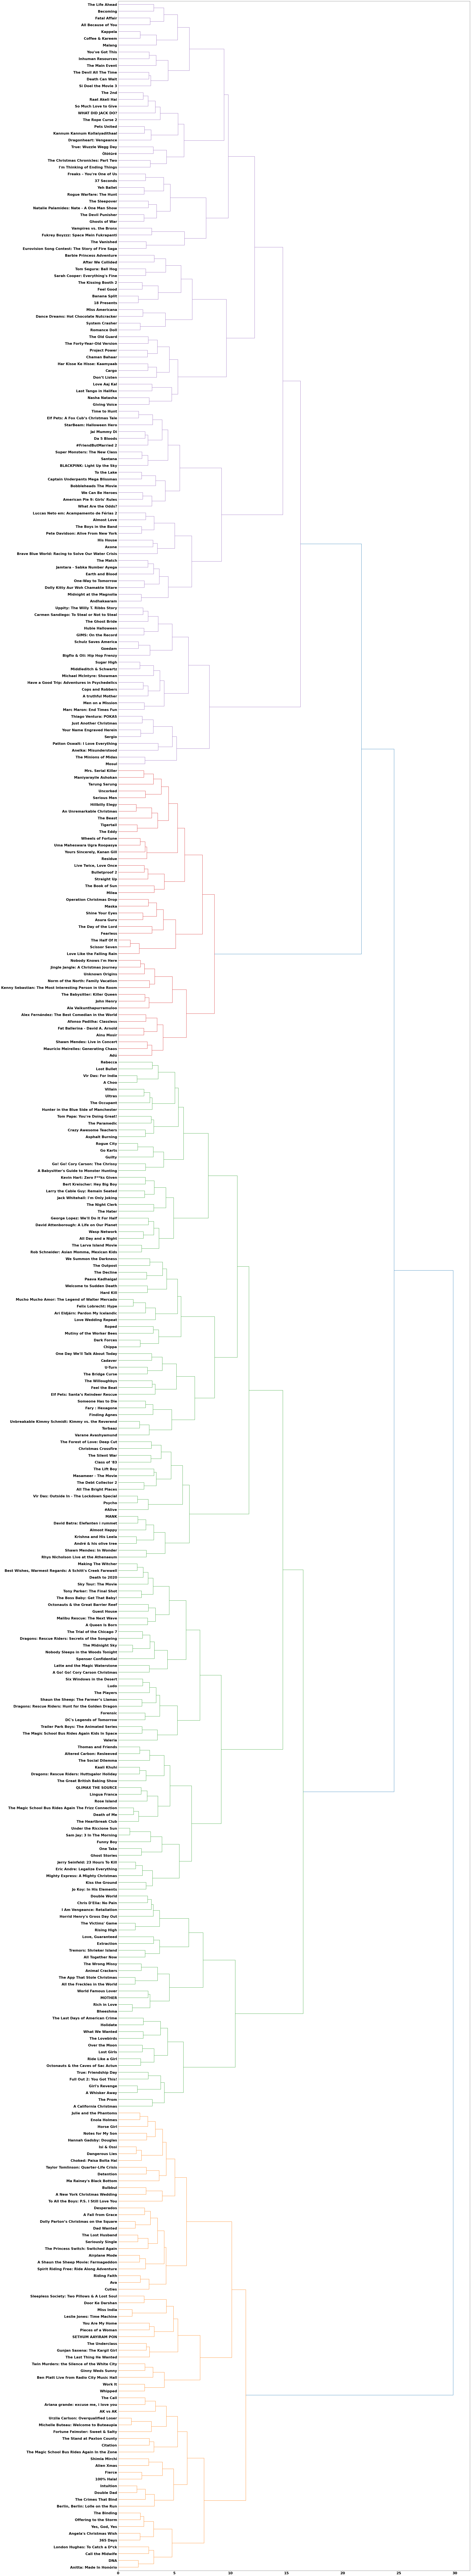

In [608]:
linkage_matrix = np.nan_to_num(ward(dist)) #define the linkage_matrix using ward clustering distances
fig, ax = plt.subplots(figsize=(40, 300))
dendrogram(linkage_matrix, orientation="right",labels=titles, count_sort='descending')
ax.tick_params(axis='x', which='major', labelsize=22)
ax.tick_params(axis='y', which='major', labelsize=22)

While this visualization aint the hardest to do, It provides a functionality close to recommender systems and can come in handy if you have watched some movie years back and would like to find smth similar to it among the others - the clustering hierarchy allows you to determine the movies which are the closest by the mean of synopsis. Like the last two: DNA and Anitta: whatever or Offering to the Storm and Yes, God, Yes .

In [630]:
Storm = df.description[df.title=='Offering to the Storm'].values 
Yes = df.description[df.title=='Yes, God, Yes'].values

In [632]:
print(Storm)

['Amaia investigates several suspicious infant deaths and horrific rituals. Meanwhile, people around her risk grave danger. Part 3 in the Baztan Trilogy.']


In [633]:
print(Yes)

['A devoutly religious teen grapples with her own sexual awakening, and attends a Catholic school retreat in the hopes of suppressing her newfound urges.']


I randomly chosen the weirdest, lol) But anyway - they're similar in the describtion (religious stuff) so this thing works fine